In [1]:
from sympy import symbols
from sympy import Matrix
from sympy import diff
from sympy import simplify
from sympy import solve
from sympy import expand
import matplotlib.pyplot as plt
import numpy as np

# Logistic

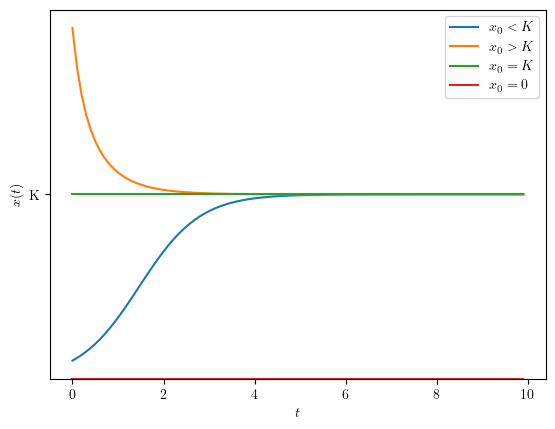

In [2]:
# Solution to logistic growth equation
def logis(t, K, r, x0):
    C = K / x0 - 1
    return K * np.exp(t * r) / (C + np.exp(t * r))


# Plotting for different values of x0

t = np.arange(0, 10, 0.1)
plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern"})
fig, ax = plt.subplots()
ax.set_ylim(0, 200)
ax.set_yticks(ticks=[100], labels=["K"])
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
ax.plot(t, logis(t, 100, 1.5, 10), label="$x_0 < K$")
ax.plot(t, logis(t, 100, 1.5, 190), label="$x_0 > K$")
ax.plot(t, logis(t, 100, 1.5, 100), label="$x_0 = K$")
ax.plot(t, np.zeros(t.shape[0]), label="$x_0 = 0$")
ax.legend()
plt.savefig("logis.pdf")
plt.show()

# Lotka Volterra

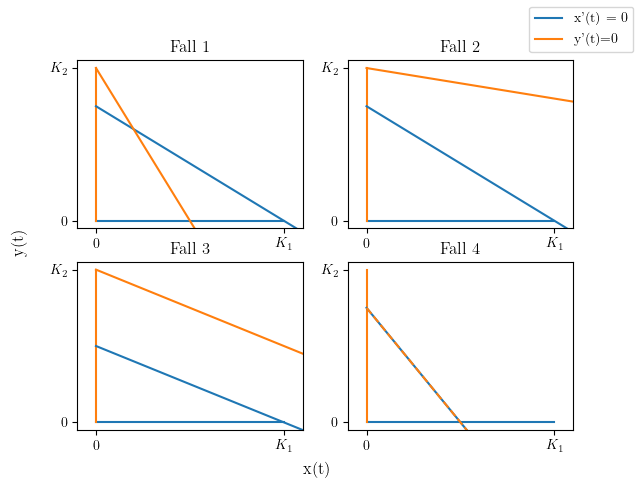

In [3]:
def ynull_y(K2, alpha2, r2, x):
    return K2 * (1 - alpha2 * x / r2)


def xnull_y(K1, alpha1, r1, x):
    return r1 / alpha1 * (1 - x / K1)


K1, K2 = 100, 200
alpha1, alpha2 = 0.1, 0.2
r1, r2 = 15, 10
x_range = np.linspace(0, 200, 400)
K1_range = np.linspace(0, 100, 300)
fig, axs = plt.subplots(2, 2)
axs: list[plt.Axes] = (axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1])
for i, ax in enumerate(axs):
    ax.set_ylim(-10, K2 + 10)
    ax.set_xlim(-10, K1 + 10)
    ax.set_yticks(ticks=[0, K2], labels=[0, "$K_2$"])
    ax.set_xticks(ticks=[0, K1], labels=[0, "$K_1$"])
    ax.plot(K1_range, np.zeros(K1_range.shape[0]), c="tab:blue")  # xnull
    ax.plot(np.zeros(x_range.shape[0]), x_range, c="tab:orange")  # ynull
    ax.set_title(f"Fall {i+1}")
fig.supxlabel("x(t)")
fig.supylabel("y(t)")
ax1, ax2, ax3, ax4 = axs


ax1.plot(x_range, xnull_y(K1, alpha1, r1, x_range), label="x'(t) = 0")
ax1.plot(x_range, ynull_y(K2, alpha2, r2, x_range), label="y'(t)=0")

ax2.plot(x_range, xnull_y(K1, alpha1, r1, x_range))
ax2.plot(x_range, ynull_y(K2, alpha2, r2 * 10, x_range))

ax3.plot(x_range, xnull_y(K1, alpha1, 10, x_range))
ax3.plot(x_range, ynull_y(K2, alpha2, 40, x_range))

ax4.plot(x_range, xnull_y(r2 / alpha2, alpha1, r1, x_range))
ax4.plot(x_range, ynull_y(r1 / alpha1, alpha2, r2, x_range), linestyle="--")
fig.legend()
plt.savefig("fall.pdf")
plt.show()

# Using Sympy for symbolical calculations

In [4]:
alpha1, alpha2, r1, r2, K1, K2, x_range, y = symbols("alpha1 alpha2 r1 r2 K1 K2 x y")


# x'
def xp():
    return r1 * x_range * (1 - x_range / K1) - alpha1 * x_range * y


# y'
def yp():
    return r2 * y * (1 - y / K2) - alpha2 * x_range * y


# Find jacobian
def find_J():
    return Matrix(
        [
            [simplify(diff(xp(), x_range)), simplify(diff(xp(), y))],
            [simplify(diff(yp(), x_range)), simplify(diff(yp(), y))],
        ]
    )


# Solving for all eq pts
print("eq pts:")
print(
    solve(
        [
            r1 * x_range * (1 - x_range / K1) - alpha1 * x_range * y,
            r2 * y * (1 - y / K2) - alpha2 * x_range * y,
        ],
        [x_range, y],
    )
)

print("nullclines:")
print("x:")
print(solve(xp(), [x_range]))
print("y")
print(solve(yp(), [y]))
solve(
    [
        r1 * x_range * (1 - x_range / K1) - alpha1 * x_range * y,
        r2 * y * (1 - y / K2) - alpha2 * x_range * y,
    ],
    [x_range, y],
)[3][0]
find_J()

eq pts:
[(0, 0), (0, K2), (K1, 0), (K1*r2*(-K2*alpha1 + r1)/(-K1*K2*alpha1*alpha2 + r1*r2), (-K1*K2*alpha2*r1 + K2*r1*r2)/(-K1*K2*alpha1*alpha2 + r1*r2))]
nullclines:
x:
[0, K1*(-alpha1*y + r1)/r1]
y
[0, K2*(-alpha2*x + r2)/r2]


Matrix([
[-alpha1*y + r1 - 2*r1*x/K1,                  -alpha1*x],
[                 -alpha2*y, -alpha2*x + r2 - 2*r2*y/K2]])

In [5]:
# Jacobian in point x,y
def J(x, y):


    J11 = simplify(-alpha1 * y + r1 - 2 * r1 * x / K1)


    J12 = simplify(-alpha1 * x)


    J21 = simplify(-alpha2 * y)


    J22 = simplify(-alpha2 * x + r2 - 2 * r2 * y / K2)


    return Matrix([[J11, J12], [J21, J22]])



# jacobian in non trivial eq point


jacob = J(
    K1 * r2 * (-K2 * alpha1 + r1) / (-K1 * K2 * alpha1 * alpha2 + r1 * r2),
    (-K1 * K2 * alpha2 * r1 + K2 * r1 * r2) / (-K1 * K2 * alpha1 * alpha2 + r1 * r2),
)


# Trace


Tr = jacob[0] + jacob[3]


# determinant


det = simplify(jacob.det())


lam = symbols("λ")


Tr


jacob

Matrix([
[       r1*r2*(K2*alpha1 - r1)/(-K1*K2*alpha1*alpha2 + r1*r2), K1*alpha1*r2*(K2*alpha1 - r1)/(-K1*K2*alpha1*alpha2 + r1*r2)],
[K2*alpha2*r1*(K1*alpha2 - r2)/(-K1*K2*alpha1*alpha2 + r1*r2),        r1*r2*(K1*alpha2 - r2)/(-K1*K2*alpha1*alpha2 + r1*r2)]])

In [6]:
det

r1*r2*(-K1*K2*alpha1*alpha2 + K1*alpha2*r1 + K2*alpha1*r2 - r1*r2)/(K1*K2*alpha1*alpha2 - r1*r2)

# Phase portraits

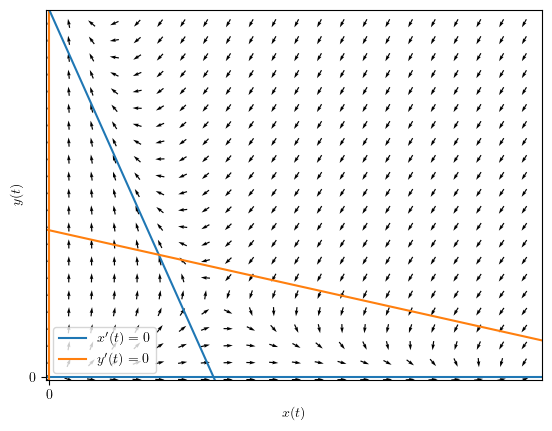

In [50]:
# Parameters for asym stable eqpt
# K1, K2 = 100, 150
# alpha1, alpha2 = 0.01, 0.1
# r1, r2 = 30, 5

# Parameters for unstable eqpt
K1, K2 = 150, 200
alpha1, alpha2 = 0.1, 0.2
r1, r2 = 5, 12

x = np.linspace(-1, K2, 30)


y = np.linspace(-1, K2, 30)


X, Y = np.meshgrid(x, y)



def derivatives(X, Y):

    x, y = X, Y

    return np.array(
        [
            r1 * x * (1 - x / K1) - alpha1 * x * y,
            r2 * y * (1 - y / K2) - alpha2 * x * y,
        ]
    )



dX, dY = derivatives(X, Y)



M = np.sqrt(dX**2 + dY**2)


dX /= M


dY /= M


M[M == 0] = 1
# plt.gcf().set_size_inches(10, 10)


plt.quiver(X, Y, dX, dY, pivot="mid")
# Plotting axis nullclines


plt.plot(x, 0 * y, c="tab:blue")


plt.plot(0 * x, y, c="tab:orange")

plt.xlim(-1, K1)
plt.ylim(-1, K1)
# Plotting nullclines
plt.plot(x, K1 * (-alpha1 * y + r1) / r1, label="$x'(t) = 0$", c="tab:blue")
plt.xticks([0], [0])
plt.yticks([0], [0])
plt.xlabel("$x(t)$")
plt.ylabel("$y(t)$")
plt.plot(K2 * (-alpha2 * x + r2) / r2, y, label="$y'(t) = 0$", c="tab:orange")
plt.legend()
# plt.savefig("asymstable.pdf")
plt.savefig("unstable.pdf")
plt.show()

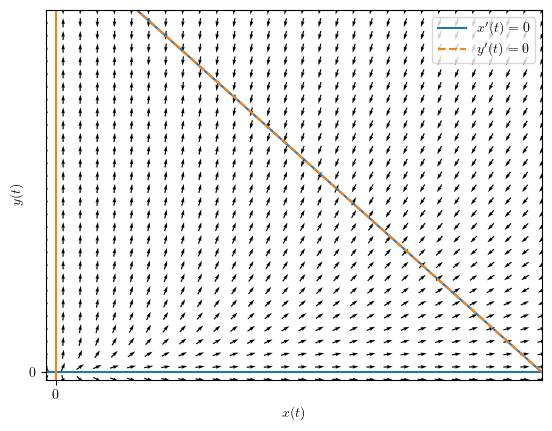

In [54]:
# Parameters for same line nullclines

alpha1, alpha2 = 0.1, 0.2
r1, r2 = 5, 12
K1, K2 = r2 / alpha2, r1 / alpha1
x = np.linspace(-1, K2, 30)


y = np.linspace(-1, K2, 30)


X, Y = np.meshgrid(x, y)


def derivatives(X, Y):

    x, y = X, Y

    return np.array(
        [
            r1 * x * (1 - x / K1) - alpha1 * x * y,
            r2 * y * (1 - y / K2) - alpha2 * x * y,
        ]
    )


dX, dY = derivatives(X, Y)


M = np.sqrt(dX**2 + dY**2)


dX /= M


dY /= M


M[M == 0] = 1
# plt.gcf().set_size_inches(10, 10)


plt.quiver(X, Y, dX, dY, pivot="mid")
# Plotting axis nullclines


plt.plot(x, 0 * y, c="tab:blue")


plt.plot(0 * x, y, c="tab:orange")

plt.xlim(-1, K2)
plt.ylim(-1, K2)
# Plotting nullclines
plt.plot(x, K1 * (-alpha1 * y + r1) / r1, label="$x'(t) = 0$", c="tab:blue")
plt.xticks([0], [0])
plt.yticks([0], [0])
plt.xlabel("$x(t)$")
plt.ylabel("$y(t)$")
plt.plot(
    K2 * (-alpha2 * x + r2) / r2, y, label="$y'(t) = 0$", c="tab:orange", linestyle="--"
)
plt.legend()
plt.savefig("sameline.pdf")
plt.show()